<a href="https://colab.research.google.com/github/EnochYounceSAIC/colab/blob/main/weekone/Attenuation%20and%20EDFAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [125]:
length = 3000
span = 100
#Fiber type: SMF-28
#current task: model EDFA noise and amplification for OOK
EDFA_noise = 4.7 #dB
EDFA_gain = 17 #dBm
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
#EDFA used EDFA 100s : https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_ID=10680
#because OOK, assuming single wavelength light, using 1550nm
lambda_light = 1550e-9
f_light = 3e8/lambda_light
#using max attenuation as a graph or standard deviation is not provided
attenuation = 0.17 #dB/km
power_initial = 3 #dBm

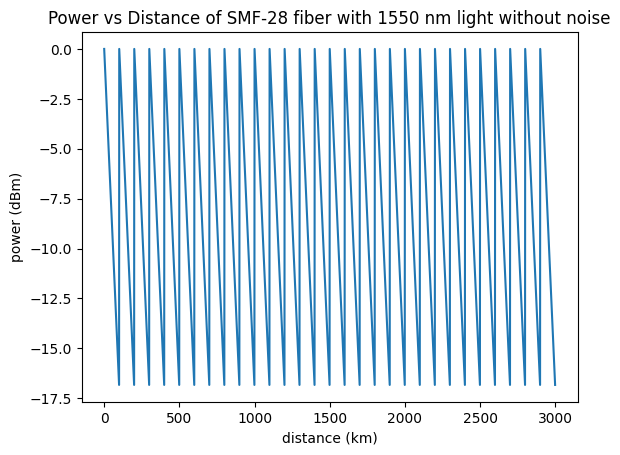

In [126]:
distance = np.arange(0,length,1)
power =  -(attenuation *(distance % span))
noise = 0
plt.plot(distance,power)
plt.xlabel('distance (km)')
plt.ylabel('power (dBm)')
plt.title('Power vs Distance of SMF-28 fiber with 1550 nm light without noise')
plt.show()

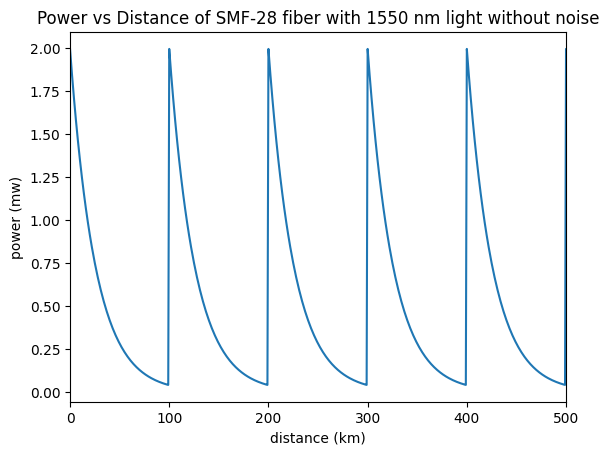

In [127]:
plt.plot(distance,10**(power/10)*10**(power_initial/10))
plt.xlabel('distance (km)')
plt.ylabel('power (mw)')
plt.xlim(0,500)

plt.title('Power vs Distance of SMF-28 fiber with 1550 nm light without noise')
plt.show()

2.788846294400001e-26


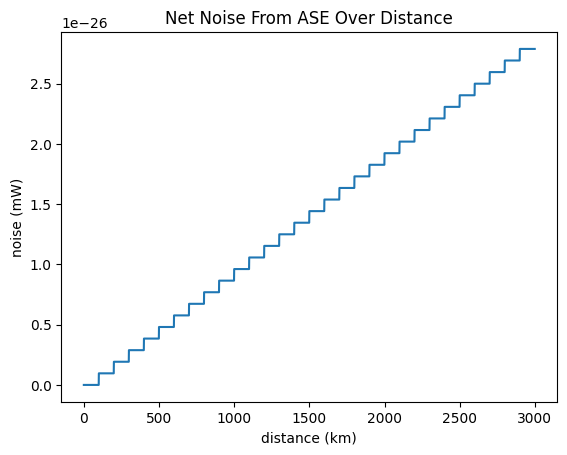

In [159]:
#noise calculations
planks_const = 6.626e-34 #J*s
bandwidth = 0.1*10**(-9) #0.1nm
power_ase = EDFA_noise*planks_const*193*(10**12)*(EDFA_gain-1)*bandwidth    #mW
noise = (distance//span)*(power_ase)
plt.plot(distance,noise)
plt.xlabel('distance (km)')

plt.title("Net Noise From ASE Over Distance")
plt.ylabel('noise (mW)')
print(noise[2999]) #approximate total noise in mW
plt.show()

<ipython-input-160-17efaf78e16f>:1: RuntimeWarning: divide by zero encountered in log10
  power_noise = 10*np.log10(noise*1000)


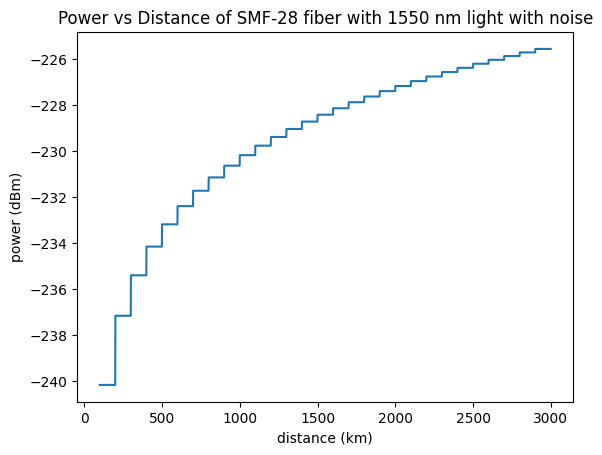

In [160]:
power_noise = 10*np.log10(noise*1000)
plt.plot(distance,power_noise)
plt.xlabel('distance (km)')
plt.ylabel('power (dBm)')
plt.title('Power vs Distance of SMF-28 fiber with 1550 nm light with noise')
plt.show()
#

In [ ]:
#chromatic dispersion practice/work here
dispersion = 18 #ps/nm/km